<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/22_scikits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀의 과적합을 방지하는 규제
  - Optimazation 최적화 => 과적합
# Regularization (규제가 필요)
# Lasso : L1 규제 (차)
# Ridge : L2 규제 (차의 제곱)
# ElasticNet : 두개를 사용(L1, L2)
# CV : cross validation
- 데이터를 일정한 사이트로 분할
- 모두가 train과 validation에 참여하여 가장 적절한 parameter를 결정

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
diabetes_X.shape

(442, 10)

In [ ]:
type(diabetes_y)
np.unique(diabetes_y)

array([ 25.,  31.,  37.,  39.,  40.,  42.,  43.,  44.,  45.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  57.,  58.,  59.,  60.,
        61.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  77.,  78.,  79.,  80.,  81.,  83.,  84.,  85.,
        86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
        97.,  98.,  99., 100., 101., 102., 103., 104., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 131., 132., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 150., 151., 152., 153., 154., 155., 156., 158., 160., 161.,
       162., 163., 164., 166., 167., 168., 170., 171., 172., 173., 174.,
       175., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 189., 190., 191., 192., 195., 196., 197., 198., 199., 200.,
       201., 202., 206., 208., 209., 210., 212., 21

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X, diabetes_y, random_state = 0)

regr = linear_model.LinearRegression()  # 디폴트 값에 주의 : - 상태

regr.fit(X_train, y_train)  # 적합, 학습
diabetes_y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)  # 기울기
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
print("결정계수: %.2f" % r2_score(y_test, diabetes_y_pred))  # 예측값과 실제 값으로 계수 구하기

Coefficients: 
 [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Mean squared error: 3180.16
결정계수: 0.36


In [ ]:
X_test.shape

(111, 10)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

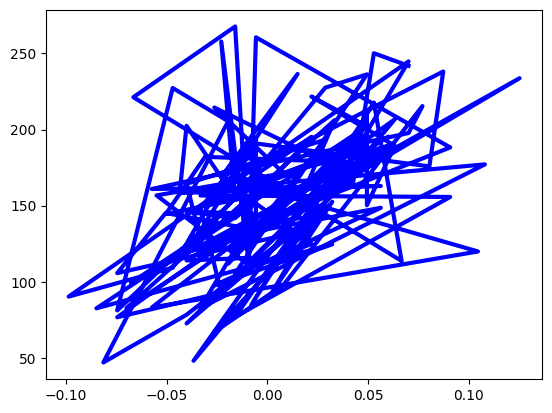

In [ ]:
import matplotlib.pyplot as plt
# X_test : ndarray이다.
# plt.scatter(X_test[:, 1], y_test, color="black")
plt.plot(X_test[:, 3], diabetes_y_pred, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

In [ ]:
# 비선형회귀

x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)  # 3차원(3차 방정식)으로 추상화
z  # 3차, 2차, 1차, 절편 순서로 출력

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)  # 3x2
X

# [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)  # 3x2 데이터를 2차원으로 인스턴스하고
poly.fit_transform(X)  # 특징 추출하니 3x6 데이터(행렬)로 바뀌어짐

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
from sklearn.linear_model import Ridge  # Ridge는 L2 규제를 사용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  # make_pipeline : 연속된 처리를 하나의 단위로 묶어줄 때 사용
def f(x):
  return x * np.sin(x)

In [ ]:
x_plot = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)  # 0에서 10까지 100개 만들기
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

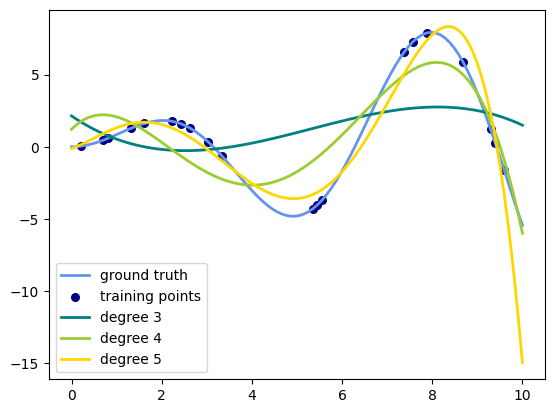

In [ ]:
# 열을 행으로 변경
X = x[:, np.newaxis]  # 축의 추가 : 모델의 입력은 2차원 데이터여야 한다.
X_plot = x_plot[:, np.newaxis]  # 평가 데이터 (평가 데이터도 2차원이여야 함)
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label='ground truth')
plt.scatter(x, y, color='navy', s=30, marker='o', label='training points')
for count, degree in enumerate([3, 4, 5]):  # 3차원, 4차원, 5차원으로 비선형회귀 
  model = make_pipeline(PolynomialFeatures(degree), Ridge())  # degree에 3, 4, 5가 들어가고 Ridge()를 실행 
  # pipeline의 마지막은 model(모델)이 있어야 함
  model.fit(X, y)  # 3번을 학습 / model.fit() : Ridge()의 모델 / fit()를 pipeline에 적용
  y_plot = model.predict(X_plot)
  plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
           label='degree %d' % degree)
plt.legend(loc='lower left')
plt.show()

In [ ]:
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)

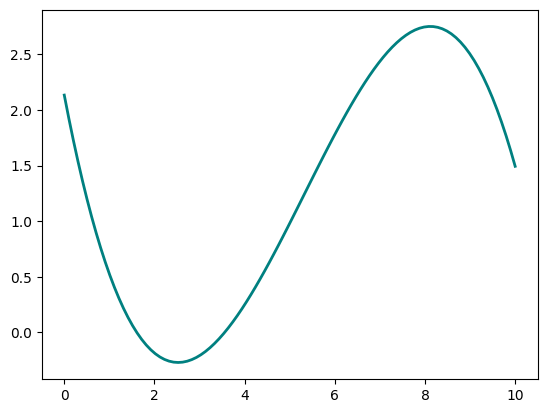

In [ ]:
plt.plot(x_plot, y_plot, color=colors[0], linewidth=lw,
         label='degree %d' % degree)

In [ ]:
# 문제
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]
# 위의 데이터를 이용하여 선형회귀를 실시
# 기울기와 절편 확인
# 수식을 생성

In [ ]:
reg = linear_model.LinearRegression()  # 선형회귀 모델 객체를 생성
reg.fit(X, y)  # 생성한 선형회귀 모델 reg에 데이터를 적합시키는 역할 / X는 독립 변수, y는 종속 변수
reg.coef_  #  모델에서 계수 또는 가중치를 나타냄

array([0.5, 0.5])

In [ ]:
reg.intercept_  # 선형회귀 모델의 절편

1.1102230246251565e-16

In [ ]:
# x1과 x2가 0일 때 종속변수 y의 예측값 계산
x1 = 0
x2 = 0
# reg.coef_[0] : 첫번째 독립변수의 가중치
# reg.coef_[1] : 두번째 독립변수의 가중치
# reg.intercept_ : 절편값
y = reg.coef_[0] * x1 + reg.coef_[1] * x2 + reg.intercept_  # 선형회귀 모델의 방정식
y

1.1102230246251565e-16

In [ ]:
# 선형회귀 모델을 구현
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
california = fetch_california_housing()
type(california)  # Bunch는 dictionary로 생성된다.

sklearn.utils._bunch.Bunch

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# 데이터셋을 데이터프레임으로 변환
dfX = pd.DataFrame(california.data, columns=california.feature_names)
dfy = pd.DataFrame(california.target, columns=['price'])
print(dfX.head())
dfy.head()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
dfX.shape  # 20640개 데이터

(20640, 8)

In [ ]:
from sklearn.linear_model import LinearRegression

model_california = LinearRegression().fit(california.data, california.target)  # fit()으로 모델 훈련

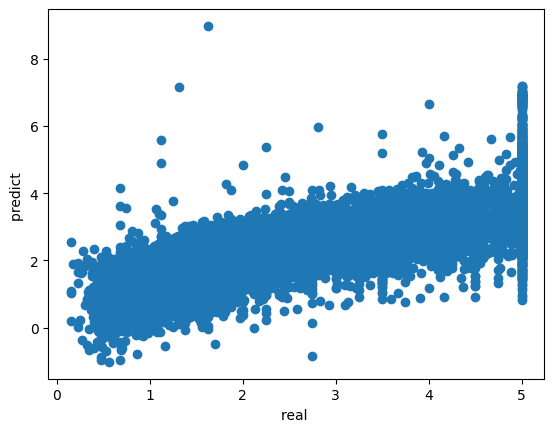

In [ ]:
# 주택 가격을 예측하고, 실제 값과 예측 값 사이의 산점도
predictions = model_california.predict(california.data)

plt.scatter(california.target, predictions)
plt.xlabel(u'real ')
plt.ylabel(u'predict ')

plt.show()

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
(1000000, 1)


<Axes: >

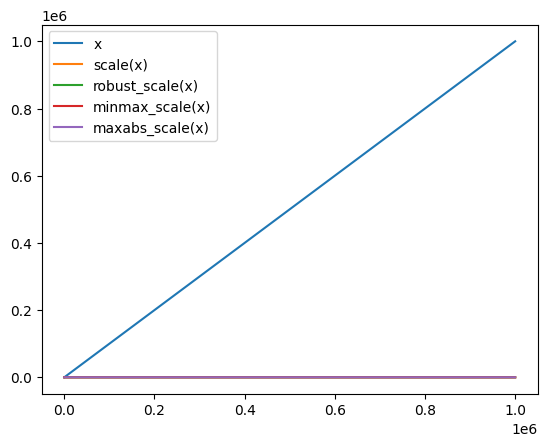

In [ ]:
# 다양한 정규화 방법으로 변환한 후 변환된 값들을 데이터프레임에 저장하고 시각화
# 표준화, 로버스트 스케일링, 최소-최대 스케일링, 최대 절대값 스케일링
# 정규화
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
print(np.arange(10, dtype = np.float64)-3)  # -3부터 10개의 원소를 가진 배열을 생성하는 코드

x = (np.arange(1000000, dtype = np.float64)-3).reshape(-1, 1)  # -3부터 1000000개의 원소를 가진 배열을 생성하고 2차원 배열로 변환 / (1000000, 1) 배열
print(x.shape)

df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x),  # hstack() : 수평 방향으로 배열을 결합
                             maxabs_scale(x)]),
        columns = ['x', 'scale(x)', 'robust_scale(x)', 'minmax_scale(x)',
                   'maxabs_scale(x)'])
df.plot()  # 데이터프레임의 값 시각화

In [ ]:
# iris 데이터
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()  # 데이터셋 로드
print(type(iris))   # Bunch

data1 = iris.data  # 원본 데이터
print(data1.shape)
data2 = scale(iris.data)  # 정규화된 데이터
print("전처리 전 평균: ", np.mean(data1, axis=0))
print("전처리 전 std : ", np.std(data1,  axis=0))
print("전처리 후 평균: ", np.mean(data2, axis=0))
print("전처리 후 std : ", np.std(data2,  axis=0))
# 분포는 동일하다 => 사이즈는 다름 (+, -)
sns.jointplot(data1[:, 0])  # 양수 데이터 
plt.show()
sns.jointplot(data2[:, 0])  # 평균을 0점으로 +, - (전처리)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 인스턴스하여 scaler 객체 생성
scaler.fit(data1)  # 열별로 평균과 표준편차 (변수별로) / data1 데이터로 표준화 스케일러 학습
data2 = scaler.transform(data1)  # data1을 표준화된 형태로 변환한 후 data2에 저장
print(data1.std(), data2.std())  # data1과 data2의 표준편차 계산

data3 = scaler.fit_transform(data1)  # fit_transform(data1) : data1의 fit()와 transform() 동시에 처리
data3.std()

1.9738430577598278 1.0


1.0

In [ ]:
# 문제
# data3에 대해 원래의 데이터로 복원하고 표준편차 구하기 <1.9738430577598278>
# iris 데이터 : 독립변수 4개, 종속변수 1개
scaler.inverse_transform(data3).std()

1.9738430577598278

In [ ]:
# 문제
# iris 데이터에 대해 minmax_scaler class를 적용
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler : 데이터의 최소값과 최대값을 이용하여 정규화
data1 = iris.data
minmax = MinMaxScaler()
res = minmax.fit_transform(data1)
res[0, :]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [ ]:
minmax.inverse_transform([[0.2345, 0.11, 0.22, 0.33]])  # 정규화된 데이터를 원래의 스케일로 복원 (역변환)

array([[5.1442, 2.264 , 2.298 , 0.892 ]])

In [ ]:
# 방향으로 정규화(normalize)
# 벡터 = 크기 + 방향 / norm을 구함
# 크기는 1이 된다. => 방향은 곱셈으로 사용 (항등원)
from sklearn import preprocessing
X = [[1., -1.,  2.],
     [2.,  0.,  0.],
     [0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')  #  L2 규제를 사용하여 정규화 (벡터 크기를 1로 조정)
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
# class로 중복 구현한 이유는? -> 크기값을 기억하고 있음
# normalizer는 원본값으로 복원이 가능하다 (normalized는 불가능)
normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
from sklearn.impute import SimpleImputer  # 누락 데이터 대체
# strategy : mean, median, most_frequent(최빈수), constant(상수) 등으로 채울 수 있음
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'median')  # 중위수로 누락된 데이터 채우기
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [ ]:
# K nearest neighbor (KNN) : 누락된 데이터를 k-최근접 이웃 방식을 사용하여 대체
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors = 2)  # 2개의 최근접 이웃
imputer.fit_transform(X)
# 누락된 값들은 각 특성의 가장 가까운 이웃들의 평균값으로 대체

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
# 문제
# 결측치 처리하기
from sklearn.impute import SimpleImputer
dict = {'First':[100, 90, np.nan, 95],
        'Second':[30, 45, 56, np.nan],
        'Third':[np.nan, 40, 80, 98]}

df = pd.DataFrame(dict)  # 주어진 데이터가 딕셔너리 형태이기에, 데이터프레임으로 변환
imputer = KNNImputer(n_neighbors = 2)  # 2개의 최근접 이웃 / KNN 방식
df_filled = imputer.fit_transform(df)
df_filled

array([[100. ,  30. ,  69. ],
       [ 90. ,  45. ,  40. ],
       [ 97.5,  56. ,  80. ],
       [ 95. ,  43. ,  98. ]])

In [ ]:
# 이상치 제거
data_url = "http://lib.stat.cmu.edu/datasets/boston"  # Boston Housing 데이터셋
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data)
boston_df.head()

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
from scipy import stats  # stats 모듈 : 통계 관련 함수 패키지
z = np.abs(stats.zscore(boston_df))  # Z-점수를 표준편차로 표현한다.
print(z.shape)  # z 배열의 크기 
threshold = 3   # 이상치로 간주되는 임계값 범위를 지정 
print(np.where(z > 3))  # 99.7% 의 범위를 벗어나면 이상치이다.

(506, 13)
(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1

In [ ]:
# IQR 기반 이상치를 탐지
Q1 = boston_df.quantile(0.25)  # 데이터의 하위 25%
Q3 = boston_df.quantile(0.75)  # 데이터의 상위 25%
IQR = Q3 - Q1  # IQR은 데이터의 중간 50% 범위
print(IQR)
print(boston_df < (Q1 - 1.5 * IQR))
print(boston_df > (Q3 + 1.5 * IQR))

# True : 이상치가 있음

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64
        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  Fal

In [ ]:
boston_df.shape  # (506, 13)

(506, 13)

In [ ]:
boston_df = boston_df[(z < 3).all(axis=1)]  # Z-점수가 3보다 작은 모든 행, 이상치가 있는 행들이 제거
boston_df.shape  # (415, 13)

<ipython-input-89-41d16b7f2a70>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  boston_df = boston_df[(z < 3).all(axis=1)]  # Z-점수가 3보다 작은 모든 행, 이상치가 있는 행들이 제거


(415, 13)

In [ ]:
# 문제
# IQR 방식으로, 이상치를 제거한 데이터를 추출
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |
                            (boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape  # (274, 13)

(274, 13)

In [ ]:
# 문제
# 다음 데이터의 이상치를 제거
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]

In [ ]:
# 데이터 평균과 표준편차를 계산
mean = np.mean(data)
std = np.std(data)
print("평균: ", mean)
print("표준편차: ", std)

threshold = 3   # 경계값
outlier = []    # 이상치를 저장하는 리스트
for i in data:  # 데이터를 순회하면서 각 데이터 포인트에 대한 Z-점수 계산
                # Z-점수는 데이터 포인트가 평균으로부터 표준 편차의 몇 배나 떨어져 있는지를 나타냄
  z = (i-mean) / std
  if z > threshold:  # Z-점수가 임계값보다 큰 경우 이상치로 간주하여 outlier 리스트에 추가
    outlier.append(i)
print("이상치 데이터:", outlier)

평균:  2.6666666666666665
표준편차:  3.3598941782277745
이상치 데이터: [15]


In [ ]:
# scale 함수로 데이터를 표준화, 표준화된 데이터에서 Z-점수가 3보다 큰 이상치를 선택
from sklearn.preprocessing import scale
data2 = scale(data)
np.array(data)[data2 > 3]

array([15])

In [ ]:
# 원-핫 인코딩 : 범주형 변수를 0과 1로 이루어진 이진 벡터로 변환하는 작업
from sklearn.preprocessing import OneHotEncoder  # 원-핫 인코딩
ohe = OneHotEncoder()
X = np.array([[0], [1], [2]])  # X : 2차원 numpy 배열
ohe.fit(X)  # ohe.fit(X)를 호출, OneHotEncoder 객체에 X를 학습
ohe.categories_

[array([0, 1, 2])]

In [ ]:
print(ohe.transform(X))  # 희소행렬 형태
print(ohe.transform(X).toarray())  # 배열화 

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# 2차원 배열 : 리스트에 담아야 함 
print(ohe.transform([X[0]]).toarray())

[[1. 0. 0.]]


In [ ]:
ohe.inverse_transform([[1., 0., 0.,]])  # 원-핫 인코딩된 데이터를 다시 범주형 변수 형태로 변환 

array([[0]])

In [ ]:
# 문제
# [['서울'], ['서울'], ['대전'], ['부산']]
# 위의 데이터에 대해 원-핫 인코딩을 실시

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# X = np.array([['서울'], ['서울'], ['대전'], ['부산']])  # 세 가지 종류
ohe.fit([['서울'], ['서울'], ['대전'], ['부산']])  # 학습 데이터는 2차원 배열
ohe.transform([['서울'], ['서울']]).toarray()
# 인코딩할 데이터와 출력 결과는 모두 2차원 배열

array([[0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
ohe = OneHotEncoder()
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2], [1, 1, 3]])
ohe.fit(X)
ohe.categories_  # [array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [ ]:
ohe.transform(X).toarray()
# 앞의 두 자리는 array([0, 1]) / 중간의 세 자리는 array([0, 1, 2]), 뒤의 다섯 자리는 array([0, 1, 2, 3, 4])

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [ ]:
# [array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

ohe.inverse_transform(
       [[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],  # 1, 0 / 1, 0, 0 / 0, 0, 0, 0, 1 => 각자의 자리수(0, 0, 4)
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]]
)

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 3]])

In [ ]:
# 문제
# 위 데이터를 OneHotEncoding 하기
X = [['Male', 1], ['Female', 2], ['Female', 3]]
ohe.fit(X)
ohe.categories_
# array(['Female', 'Male']), array([1, 2, 3])

ohe.transform(X).toarray()


array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [ ]:
# 레이블 범주화 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

In [ ]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [ ]:
le.inverse_transform([0, 0, 1, 2])  # 원래 데이터로 복원

array([1, 1, 2, 6])

In [ ]:
# DictVectorizer : 딕셔너리 형태의 데이터를 벡터화
from sklearn.feature_extraction import DictVectorizer
# text mining : 문장을 벡터화
v = DictVectorizer(sparse = False)
D = [{'foo':1, 'bar':2}, {'foo':3, 'baz':1}]  # 딕셔너리들을 원소로 가지는 리스트, 키:데이터 형태
X = v.fit_transform(D)  # D를 벡터화
X

# 키 모으기
# [bar, baz, foo]  # 텍스트 마이닝은 DTM(Document term matrix), TDM

array([[2., 0., 1.],
       [0., 1., 3.]])

In [ ]:
v.feature_names_  # 키는 알파벳 순서대로 정렬됨

['bar', 'baz', 'foo']

In [ ]:
v.inverse_transform(X)  # 원래 데이터로 복원 (dict 형태)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [ ]:
# fake_data
from pandas import DataFrame, Series
from itertools import cycle
area = '서울 부산 대구 인천 광주 대전 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주'.split() 
college = '인문대학 사회과학대학 자연과학대학 간호대학 경영대학 공과대학 미술대학'.split()
gender = '남성 여성'.split()

fake_data = zip(range(100), cycle(area), cycle(college), cycle(gender))  #  zip() 함수 사용하여 지역, 단과대, 성별 정보를 조합하여 가상의 학생 데이터 생성
hundred_students = DataFrame([data for num, *data in fake_data],
                             columns='지역 단과대 성별'.split())  #  가상의 학생 데이터를 DataFrame 형태로 생성, 열은 '지역''단과대''성별'
hundred_students.head(10)

,지역,단과대,성별
0,서울,인문대학,남성
1,부산,사회과학대학,여성
2,대구,자연과학대학,남성
3,인천,간호대학,여성
4,광주,경영대학,남성
5,대전,공과대학,여성
6,울산,미술대학,남성
7,세종,인문대학,여성
8,경기,사회과학대학,남성
9,강원,자연과학대학,여성


In [ ]:
# 범주형 데이터 7개의 범주 -> 7개의 변수로 변환
college_one_hot_encoded = pd.get_dummies(hundred_students.단과대)  # get_dummies() : 단과대 정보를 원-핫 인코딩
college_one_hot_encoded

,간호대학,경영대학,공과대학,미술대학,사회과학대학,인문대학,자연과학대학
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,1,0,0,0,0,0
96,0,0,1,0,0,0,0
97,0,0,0,1,0,0,0
98,0,0,0,0,0,1,0


In [ ]:
# 17 + 7 + 2 => 26개의 변수로 변환
# 120개의 원-핫 인코딩 => 회귀분석 : 2개 이상의 범주형 변수가 있으면 안된다.
# pd.get_dummies() : '지역', '단과대', '성별' 열을 원-핫 인코딩
# 신경망에서 범주형 데이터 -> one-hot-encoding
# 신경망은 반드시 정규화해야 한다.
# 1, 2, 6
pd.get_dummies(hundred_students, prefix = ['지역', '단과대', '성별']).head()

# 범주형 변수는 회귀분석 할 때 원-핫 인코딩을 해주어야 한다.

,지역_강원,지역_경기,지역_경남,지역_경북,지역_광주,지역_대구,지역_대전,지역_부산,지역_서울,지역_세종,...,지역_충북,단과대_간호대학,단과대_경영대학,단과대_공과대학,단과대_미술대학,단과대_사회과학대학,단과대_인문대학,단과대_자연과학대학,성별_남성,성별_여성
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# 변수 선택법
- 모델로 하는 경우 : Tree 분석 (변수 중요도 : variable importance), 데이터 구조를 확인
- feature_selection
- PCA (principal component analysis) : 주성분 분석 : 상관계수행렬, 공분산(정방행렬, 대칭행렬) => 고유값 분해 (고유치, 고유벡터) -> 고유벡터는 정직교하는 행렬 (축행렬), 고유치는 축 방향으로의 분산의 크기를 의미

In [ ]:
# feature_selection 변수 선택법
# 변수 중요도에 따라 선택한다 -> 과적합의 위험, 노이즈 역할
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE  # recursive (재귀적) feature eliminate
from sklearn.svm import SVR  # 강력한 모델 SVR (support vector machine)
                      # SVC
# 2차 서포트 벡터 (support vector)

X, y = make_friedman1(n_samples = 50, n_features = 5, random_state = 0)  # 50x5
# 리눅스에서의 핵심 OS : 커널(kernel)
estimator = SVR(kernel = 'linear')  # SVR 설정 (선형 커널) / 데이터를 분리하는 함수

selector = RFE(estimator)  # RFE : 재귀적으로 특성을 제거
selector = selector.fit(X, y)
selector.support_  # 선택된 특성의 마스크 리턴
# 좋지 않은 변수 : 분산이 적은 변수 (False)

array([False, False, False,  True,  True])

In [ ]:
selector.ranking_

array([3, 2, 4, 1, 1])

In [141]:
# 변수가 많다고해서 다 좋은 변수는 아니다.
# 분산 기반 특성 선택
# 데이터 X에서 분산 기준으로 특성 선택을 수행, 선택된 특성을 포함하는 배열을 반환
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]  # 6x3
sel = VarianceThreshold(threshold = (0.15))  # 분산의 최소값(0.15)을 설정
sel.fit_transform(X)  # 특성 선택을 수행, 선택된 특성을 포함하는 배열을 반환

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [148]:
# 붓꽃 데이터셋에서 카이제곱 통계량을 기반으로 한 특성 선택
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  # 기준값 
X, y = load_iris(return_X_y = True)
print("원본: ", X.shape)  # 원본 데이터

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)  # 카이제곱값을 기준으로 2개의 특성을 선택 / 종속변수에 영향을 미치는 변수들을 추출
X_new.shape

원본:  (150, 4)


(150, 2)